In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
transform = transforms.Compose([
      transforms.ToTensor(),
])

# Download and load the Mnist dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

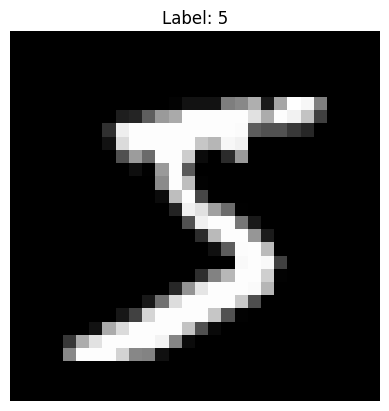

In [ ]:
# Get an element pair (image, label) from train_dataset
image, label = train_dataset[0]

# Display the image
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

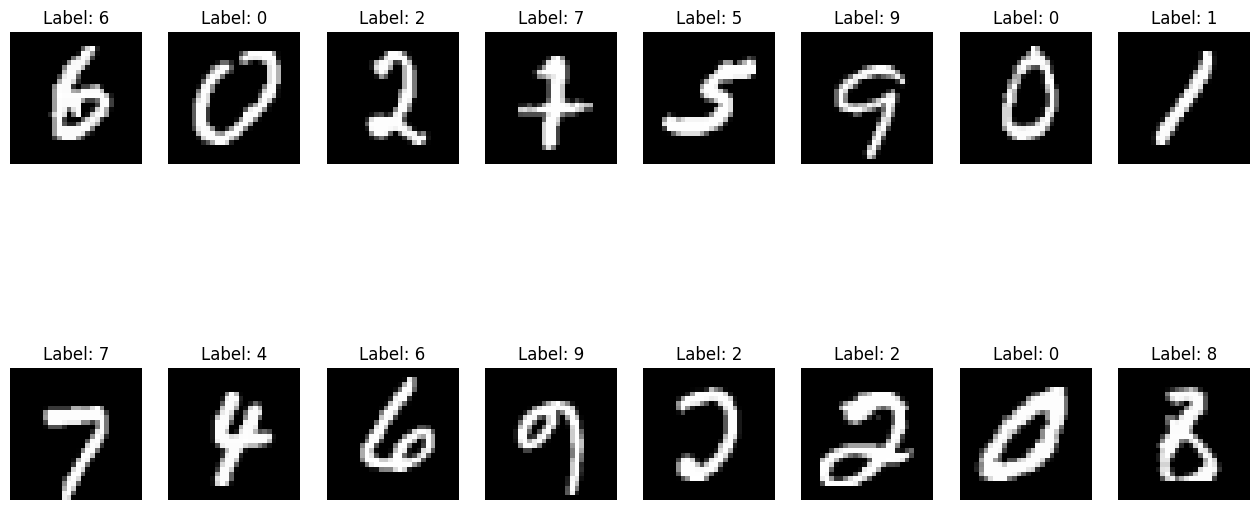

In [25]:
# Get one batch of images and labels from train_loader
images, labels = next(iter(train_loader))
# Display the images
plt.figure(figsize=(16, 8))
for i in range(16):
    plt.subplot(2, 8, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()

In [33]:
# Define the CNN model
class CNN(nn.Module):
      def __init__(self):
            super(CNN, self).__init__()
            self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
            self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
            self.fc1 = nn.Linear(64 * 7 * 7, 128)
            self.fc2 = nn.Linear(128, 10)
            self.relu = nn.ReLU()
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
            
      def forward(self, x):
            x = self.conv1(x)
            x = self.relu(x)
            x = self.pool(x)
            x = self.conv2(x)
            x = self.relu(x)
            x = self.pool(x)
            x = x.view(-1, 64 * 7 * 7)
            x = self.fc1(x)
            x = self.relu(x)
            x = self.fc2(x)
            return x

In [34]:
# define loss function and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [36]:
# Train the model
num_epochs = 20
for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i + 1) % 100 == 0:
                  print(f"Epoch {epoch + 1}/{num_epochs}, Step {i + 1}, Loss: {loss.item()}")
print("Training finished")

Epoch 1/20, Step 100, Loss: 0.02385793626308441
Epoch 1/20, Step 200, Loss: 0.005360854789614677
Epoch 1/20, Step 300, Loss: 0.022587571293115616
Epoch 1/20, Step 400, Loss: 0.022340895608067513
Epoch 1/20, Step 500, Loss: 0.014955317601561546
Epoch 1/20, Step 600, Loss: 0.029890630394220352
Epoch 1/20, Step 700, Loss: 0.005466404836624861
Epoch 1/20, Step 800, Loss: 0.004717421717941761
Epoch 1/20, Step 900, Loss: 0.11678066849708557
Epoch 2/20, Step 100, Loss: 0.014834366738796234
Epoch 2/20, Step 200, Loss: 0.0005064092692919075
Epoch 2/20, Step 300, Loss: 0.0034761112183332443
Epoch 2/20, Step 400, Loss: 0.00037844033795408905
Epoch 2/20, Step 500, Loss: 0.19772550463676453
Epoch 2/20, Step 600, Loss: 0.014116501435637474
Epoch 2/20, Step 700, Loss: 0.00040683953557163477
Epoch 2/20, Step 800, Loss: 0.006348562892526388
Epoch 2/20, Step 900, Loss: 0.0012867613695561886
Epoch 3/20, Step 100, Loss: 0.0029735739808529615
Epoch 3/20, Step 200, Loss: 0.0006561074405908585
Epoch 3/20, St

In [37]:
#evaluate the model
model.eval()
with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
      print(f"Accuracy: {100 * correct / total}%")

Accuracy: 99.24%
